In [1]:
%matplotlib notebook

from scipy.io import loadmat

 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

mat = loadmat("Project Datasets/cnDieselTrain.mat")

# X and y correspond to a training set that your model will learn on.
Xtrain = mat["cnTrainX"]
ytrain = mat["cnTrainY"]

print('shape of cnTrainX', Xtrain.shape)
print('shape of cnTrainy', ytrain.shape)

Xtrain = Xtrain.transpose()
ytrain = ytrain.transpose()


print("Xtrain")
print(Xtrain[:5,:5])
print("ytrain")
print(ytrain[:5])


shape of cnTrainX (401, 133)
shape of cnTrainy (1, 133)
Xtrain
[[0.00619124 0.00555355 0.00491586 0.00427817 0.00364047]
 [0.00646699 0.00570776 0.00494853 0.0041893  0.00343007]
 [0.0062267  0.00550648 0.00478626 0.00406603 0.00334581]
 [0.00702172 0.00616161 0.00530151 0.0044414  0.00358129]
 [0.00582804 0.00522283 0.00461762 0.00401241 0.00340719]]
ytrain
[[59.1]
 [47.7]
 [44. ]
 [46.9]
 [53.6]]


In [2]:
# Standardizing the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(Xtrain)

# Apply transform to both the training set and the validation set.
Xtrain = scaler.transform(Xtrain)

print("Xtrain")
print(Xtrain[:5,:5])

Xtrain
[[ 0.08632943  0.29709771  0.59152782  1.00698236  1.56069159]
 [ 0.8821966   0.82125181  0.72489318  0.56484404  0.29719004]
 [ 0.18865986  0.13709204  0.06245977 -0.04841897 -0.20876293]
 [ 2.48326735  2.36389753  2.16581966  1.81910058  1.2053102 ]
 [-0.96194978 -0.82702162 -0.62595131 -0.31522745  0.15983569]]


original shape:    (133, 401)
transformed shape: (133, 1)
Variance ratio corresponds to the data with PCA:
[0.44006606]


<IPython.core.display.Javascript object>


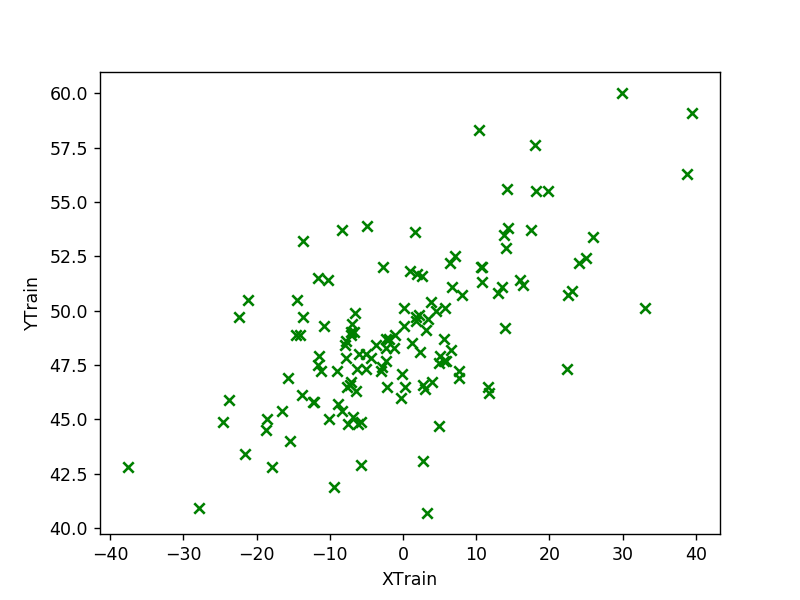

end


In [3]:
# using PCA for Data Visualization
from sklearn.decomposition import PCA

pca_plot =PCA(n_components=1)

pca_plot.fit(Xtrain)

Xtrain_pca_plot = pca_plot.transform(Xtrain)

print("original shape:   ", Xtrain.shape)
print("transformed shape:", Xtrain_pca_plot.shape)

print('Variance ratio corresponds to the data with PCA:')
print(pca_plot.explained_variance_ratio_)

fig, ax = plt.subplots()
ax.scatter(Xtrain_pca_plot, ytrain, color="green", marker="x")
ax.set_xlabel("XTrain")
ax.set_ylabel("YTrain")
print("end")


In [4]:
# using PCA for Training the model
from sklearn.decomposition import PCA

print("original shape:", Xtrain.shape)

pca =PCA(n_components=20)

pca.fit(Xtrain)

Xtrain_pca = pca.transform(Xtrain)

print("transformed shape:", Xtrain_pca.shape)

print('Variance retained corresponds to the data after reducing with PCA:')
print(pca.explained_variance_ratio_.sum())


original shape: (133, 401)
transformed shape: (133, 20)
Variance retained corresponds to the data after reducing with PCA:
0.9937700162595301


In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# X and y data as traing and correspond to a cross validation set 

Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain_pca, ytrain, test_size=0.2, random_state=0)

print('shapes of training and validation data after splitiing',Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

# using Ridge Linear Regression from sklearn

# Create Ridge linear regression object
regression_model = Ridge()

# Train the model using the training sets
regression_model.fit(Xtrain, ytrain)

# Make predictions using the testing set
ypred = regression_model.predict(Xtest)

# The coefficients
print('Coefficients: \n', regression_model.coef_)

print("ytest\n",ytest[:5])
print("ypred\n",ypred[:5])



shapes of training and validation data after splitiing (106, 20) (27, 20) (106, 1) (27, 1)
Coefficients: 
 [[ 0.16433662 -0.16337962 -0.09766486 -0.03143697 -0.13075796 -0.00088818
   0.16944541  0.33629093 -0.27770158  0.46208198  0.1763425   0.36814318
   0.12516441 -0.27764295 -0.1940652  -0.07825733 -0.04703676 -0.52653392
   0.45928869 -0.00757529]]
ytest
 [[50.1]
 [47.8]
 [49.9]
 [40.9]
 [44.8]]
ypred
 [[50.3300955 ]
 [46.54368668]
 [46.97291576]
 [42.6144541 ]
 [46.8252054 ]]


In [6]:
print(Xtrain.shape) 
print(ytrain.shape) 
print(Xtest.shape)  
print(ytest.shape) 
print(ypred.shape)

(106, 20)
(106, 1)
(27, 20)
(27, 1)
(27, 1)


In [7]:
#Calculating the errors
from sklearn import metrics
print("mean_squared_error:",metrics.mean_squared_error(ytest,ypred))
print("mean_absolute_error:",metrics.mean_absolute_error(ytest,ypred))
print("root_mean_squared_error:",np.sqrt(metrics.mean_squared_error(ytest,ypred)))


mean_squared_error: 5.252444322285726
mean_absolute_error: 1.8420378157847173
root_mean_squared_error: 2.2918211802594297


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#Hyper Parameters Set
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
params = {'alpha':alphas}

#Making models with hyper parameters sets
model = GridSearchCV(regression_model, param_grid=params, cv=10)

#Learning
model.fit(Xtrain,ytrain)

#The best hyper parameters set
print("Best Hyper Parameters with GridSearchCV:\n",model.best_params_)

#Prediction
ypred=model.predict(Xtest)
print(ytest[:5])
print(ypred[:5])

# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(model, Xtrain, ytrain, cv=10, n_jobs=-1)
print(); print('cross_val_Result:',CV_Result)
print(); print('cross_val_Mean:', CV_Result.mean())
print(); print('cross_val_Std:', CV_Result.std())

Best Hyper Parameters with GridSearchCV:
 {'alpha': 1.0}
[[50.1]
 [47.8]
 [49.9]
 [40.9]
 [44.8]]
[[50.3300955 ]
 [46.54368668]
 [46.97291576]
 [42.6144541 ]
 [46.8252054 ]]

cross_val_Result: [ 0.02387688  0.72527801  0.80386905  0.35524631  0.819736   -0.3802829
  0.54899629  0.56982184  0.62145089 -0.16822696]

cross_val_Mean: 0.3919765403162357

cross_val_Std: 0.4024580950321611


In [9]:
from sklearn.linear_model import RidgeCV 
clf_need = RidgeCV(alphas=[1, 0.1])
clf_need.fit(Xtrain,ytrain)       


RidgeCV(alphas=[1, 0.1], cv=10, fit_intercept=True, normalize=False, scoring=None)

print("best alpha with RidgeCV:", clf_need.alpha_ )

#Prediction
ypred=clf_need.predict(Xtest)
print(ytest[:5])
print(ypred[:5])


best alpha with RidgeCV: 1.0
[[50.1]
 [47.8]
 [49.9]
 [40.9]
 [44.8]]
[[50.3300955 ]
 [46.54368668]
 [46.97291576]
 [42.6144541 ]
 [46.8252054 ]]


In [10]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from math import sqrt

print ("Cross Validation")
alpha_values = np.array([1,0.1,0.01,0.001,0.0001,0])
cv_scores ={}

# perform 10-fold cross validation
for alpha_v in alpha_values:
    ridge_cv = Ridge(alpha = alpha_v)
    scores = cross_val_score(ridge_cv, Xtrain, ytrain, cv=10, scoring='neg_mean_squared_error')
    rmse= np.sqrt(abs(scores))
    cv_scores.update({alpha_v:(rmse.mean())})
print ("cv_scores:\n", cv_scores)


for i,j in cv_scores.items():
    if j==min(cv_scores.values()):
        print ("The best Alpha value is ",i," and the error  is ",j)

# plot
# fig, ax = plt.subplots()

# plot the "number of training examples" vs the validation errors
# ax.plot(list(cv_scores.keys()), list(cv_scores.values()))

# ax.set_xlabel("Alpha")
# ax.set_ylabel("RMS Error")
# ax.set_title("Linear Regression Cross Validation Curve")
# ax.grid()
# fig.show()

Cross Validation
cv_scores:
 {1.0: 2.293918350816033, 0.1: 2.310120147498358, 0.01: 2.311843936427251, 0.001: 2.3120174210436346, 0.0001: 2.312034780637019, 0.0: 2.3120367096057484}
The best Alpha value is  1.0  and the error  is  2.293918350816033


In [11]:
# Training Ridge Regression with the best hyper parameters found through cross-validation
regression_best_ridge = Ridge(alpha=1.0)

regression_best_ridge.fit(Xtrain,ytrain)

#Prediction
ypred=regression_best_ridge.predict(Xtest)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# calculate mean_squared_error
mean = mean_squared_error(ytest,ypred)
print("mean_squared_error:",format(mean))
# calculate mean_absolute_error
absolute = mean_absolute_error(ytest,ypred)
print("mean_absolute_error:",format(absolute))
rmse = np.sqrt(mean_squared_error(ytest,ypred))
print("root_ean_sqrt_error:",format(rmse))


mean_squared_error: 5.252444322285726
mean_absolute_error: 1.8420378157847173
root_ean_sqrt_error: 2.2918211802594297


In [12]:
# using the test data (112)Xtest correspond to a test set.
XtestSep = mat["cnTestX"]
print("Xtest shape",XtestSep.shape)
XtestSep = np.transpose(XtestSep)
print("Xtest shape after reshape",XtestSep.shape)
print(XtestSep[:5,:5])

from sklearn.decomposition import PCA
XtestSep = scaler.transform(XtestSep)
pca =PCA(n_components=20)
pca.fit(XtestSep)
Xtest_pca=pca.transform(XtestSep)
print(XtestSep.shape)
print(Xtest_pca.shape)

print('Variance retained corresponds to the test data after reducing with PCA:')
print(pca.explained_variance_ratio_.sum())

#Prediction of test data with the best Ridge Regression parameters
cnTesty=regression_best_ridge.predict(Xtest_pca)
print("Final output of the test data (cnTestX):")
print(cnTesty[:5])

Xtest shape (401, 112)
Xtest shape after reshape (112, 401)
[[0.00577361 0.00516089 0.00454817 0.00393545 0.00332272]
 [0.00593487 0.00528858 0.00464228 0.00399598 0.00334969]
 [0.00599132 0.0053218  0.00465228 0.00398275 0.00331323]
 [0.00606038 0.00538481 0.00470924 0.00403367 0.00335811]
 [0.0059226  0.00526412 0.00460564 0.00394717 0.00328869]]
(112, 401)
(112, 20)
Variance retained corresponds to the test data after reducing with PCA:
0.9942761099342492
Final output of the test data (cnTestX):
[[49.71617356]
 [49.92596052]
 [50.64769465]
 [51.55081925]
 [49.14441447]]


In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# using KNN  Regression from sklearn

# Create KNN  regression object
regression_model = KNeighborsRegressor()

# Train the model using the training sets
regression_model.fit(Xtrain, ytrain)

# Make predictions using the testing set
ypred = regression_model.predict(Xtest)

print("ytest\n",ytest[:5])
print("ypred\n",ypred[:5])

ytest
 [[50.1]
 [47.8]
 [49.9]
 [40.9]
 [44.8]]
ypred
 [[49.94]
 [47.96]
 [47.82]
 [46.68]
 [47.8 ]]


In [14]:
print(Xtrain.shape) 
print(ytrain.shape) 
print(Xtest.shape)  
print(ytest.shape) 
print(ypred.shape)

(106, 20)
(106, 1)
(27, 20)
(27, 1)
(27, 1)


In [15]:
#Calculating the errors
from sklearn import metrics
print("mean_squared_error:",metrics.mean_squared_error(ytest,ypred))
print("mean_absolute_error:",metrics.mean_absolute_error(ytest,ypred))
print("root_mean_squared_error:",np.sqrt(metrics.mean_squared_error(ytest,ypred)))


mean_squared_error: 7.308192592592595
mean_absolute_error: 1.9903703703703703
root_mean_squared_error: 2.703366899366898


In [16]:
from sklearn.model_selection import GridSearchCV

#Hyper Parameters Set
n_neighbors = list(range(1,30))
params = {'n_neighbors':n_neighbors, 'weights':['uniform', 'distance'],}

#Making models with hyper parameters sets
model = GridSearchCV(regression_model, param_grid=params, cv=10)

#Learning
model.fit(Xtrain,ytrain)

#The best hyper parameters set
print("Best Hyper Parameters with GridSearchCV:\n",model.best_params_)

#Prediction
ypred=model.predict(Xtest)
print(ytest[:5])
print(ypred[:5])

# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(model, Xtrain, ytrain, cv=10, n_jobs=-1)
print(); print('cross_val_Result:',CV_Result)
print(); print('cross_val_Mean:', CV_Result.mean())
print(); print('cross_val_Std:', CV_Result.std())

Best Hyper Parameters with GridSearchCV:
 {'n_neighbors': 8, 'weights': 'uniform'}
[[50.1]
 [47.8]
 [49.9]
 [40.9]
 [44.8]]
[[49.6375]
 [47.6625]
 [47.975 ]
 [46.4875]
 [47.75  ]]

cross_val_Result: [ 0.28787303  0.78258245  0.56510806  0.46669222  0.53693183 -0.13680973
  0.66308818  0.28407393  0.44222775  0.55622125]

cross_val_Mean: 0.4447988969029085

cross_val_Std: 0.24214425734674475


Cross Validation:
cv_scores:
 {1: 2.8584411609628773, 2: 2.5597877523132437, 3: 2.4328155297079688, 4: 2.4289549252121847, 5: 2.411119052132744, 6: 2.387883157197779, 7: 2.361989377656627, 8: 2.305807216098499, 9: 2.34043018971806, 10: 2.3758515856621596, 11: 2.3332283116922503, 12: 2.3676212681297963, 13: 2.3418366276876506, 14: 2.371047630655762, 15: 2.3609953303406206, 16: 2.37645789671309, 17: 2.415136312429946, 18: 2.411468936254703, 19: 2.4203065314783183, 20: 2.440207831900658, 21: 2.456763176948861, 22: 2.461824632253675, 23: 2.481532999577333, 24: 2.4952498604716284, 25: 2.5048851095652522, 26: 2.5120713879248417, 27: 2.5174861738111662, 28: 2.5333706340352014, 29: 2.548066162960528}

The best K value is  8  and the error  is  2.305807216098499


<IPython.core.display.Javascript object>


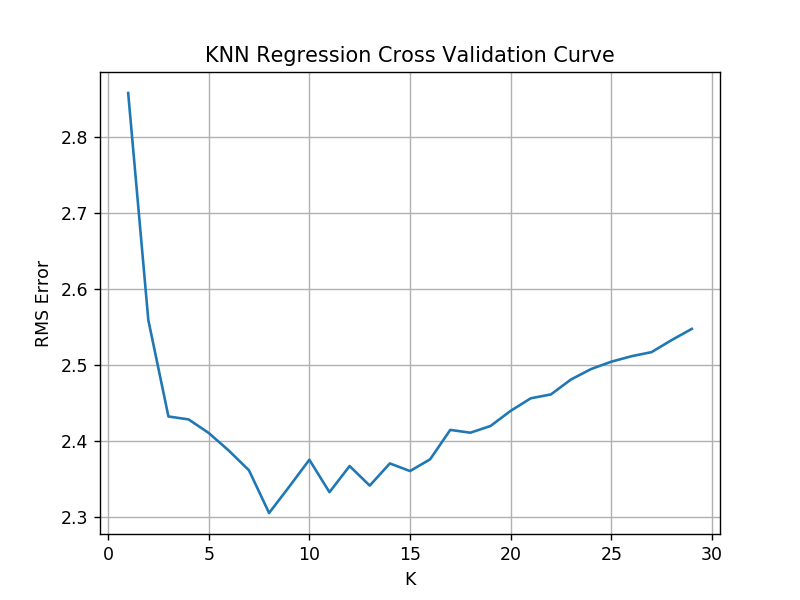

In [17]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from math import sqrt

print ("Cross Validation:")
k_values = list(range(1,30))
cv_scores ={}

# perform 10-fold cross validation
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    scores = cross_val_score(knn, Xtrain, ytrain, cv=10, scoring='neg_mean_squared_error')
    rmse= np.sqrt(abs(scores))
    cv_scores.update({k:(rmse.mean())})
print ("cv_scores:\n", cv_scores)


for i,j in cv_scores.items():
    if j==min(cv_scores.values()):
        print ("\nThe best K value is ",i," and the error  is ",j)

# plot
fig, ax = plt.subplots()

# plot the "K" vs "RMSE"
ax.plot(list(cv_scores.keys()), list(cv_scores.values()))

ax.set_xlabel("K")
ax.set_ylabel("RMS Error")
ax.grid()
fig.show()

In [18]:
# Training KNN Regression with the best hyper parameters found through cross-validation
regression_best_KNN = KNeighborsRegressor(n_neighbors=8)

regression_best_KNN.fit(Xtrain,ytrain)

#Prediction
ypred=regression_best_KNN.predict(Xtest)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# calculate mean_squared_error
mean = mean_squared_error(ytest,ypred)
print("mean_squared_error:",format(mean))
# calculate mean_absolute_error
absolute = mean_absolute_error(ytest,ypred)
print("mean_absolute_error:",format(absolute))
rmse = np.sqrt(mean_squared_error(ytest,ypred))
print("root_mean_sqrt_error:",format(rmse))

mean_squared_error: 7.140827546296303
mean_absolute_error: 1.94675925925926
root_mean_sqrt_error: 2.6722326893996904


In [19]:
# using the test data (112)Xtest correspond to a test set.
XtestSep = mat["cnTestX"]
print("Xtest shape",XtestSep.shape)
XtestSep = np.transpose(XtestSep)
print("Xtest shape after reshape",XtestSep.shape)
print(XtestSep[:5,:5])

from sklearn.decomposition import PCA
XtestSep = scaler.transform(XtestSep)
pca =PCA(n_components=20)
pca.fit(XtestSep)
Xtest_pca=pca.transform(XtestSep)
print("Xtest shape after PCA:", Xtest_pca.shape)

print('Variance retained corresponds to the test data after reducing with PCA:')
print(pca.explained_variance_ratio_.sum())

#Prediction of test data with the best Ridge Regression parameters
cnTesty=regression_best_KNN.predict(Xtest_pca)
print("Final output of the test data (cnTestX):")
print(cnTesty[:5])

Xtest shape (401, 112)
Xtest shape after reshape (112, 401)
[[0.00577361 0.00516089 0.00454817 0.00393545 0.00332272]
 [0.00593487 0.00528858 0.00464228 0.00399598 0.00334969]
 [0.00599132 0.0053218  0.00465228 0.00398275 0.00331323]
 [0.00606038 0.00538481 0.00470924 0.00403367 0.00335811]
 [0.0059226  0.00526412 0.00460564 0.00394717 0.00328869]]
Xtest shape after PCA: (112, 20)
Variance retained corresponds to the test data after reducing with PCA:
0.9942761099342492
Final output of the test data (cnTestX):
[[49.7375]
 [48.6875]
 [49.9625]
 [48.6   ]
 [49.95  ]]


In [20]:
Final_Output = regression_best_ridge.predict(Xtest_pca)
print(Final_Output)



[[49.71617356]
 [49.92596052]
 [50.64769465]
 [51.55081925]
 [49.14441447]
 [50.22553514]
 [51.60851518]
 [49.39362007]
 [52.21912092]
 [51.70026947]
 [49.00938651]
 [56.10292961]
 [52.88102365]
 [49.20861642]
 [44.66284502]
 [50.66700897]
 [56.16443703]
 [48.35631902]
 [50.67021447]
 [47.5895227 ]
 [49.68564141]
 [48.94500547]
 [39.96453845]
 [51.0134263 ]
 [45.03996145]
 [50.42518297]
 [49.50235947]
 [46.74332288]
 [49.03709502]
 [49.57696737]
 [50.94687587]
 [47.88629618]
 [47.32438244]
 [50.60162794]
 [52.00795314]
 [49.99270954]
 [49.03807511]
 [49.51667938]
 [45.74767471]
 [47.69101098]
 [45.98826215]
 [49.9124483 ]
 [51.68789825]
 [47.50422487]
 [48.15629021]
 [50.80206424]
 [47.47189815]
 [44.43744178]
 [49.21373646]
 [42.14890451]
 [45.5209021 ]
 [48.33368209]
 [43.3251595 ]
 [47.93775338]
 [47.84809656]
 [50.31897232]
 [47.73436799]
 [50.42963641]
 [49.8489175 ]
 [51.48713197]
 [47.01450797]
 [48.64282226]
 [49.80130751]
 [49.05435407]
 [47.99079424]
 [47.14813864]
 [48.36437